<a href="https://colab.research.google.com/github/MichaelGajhede/BiBi_enzyme_kinetics/blob/main/ASMT_kinetics_yutian_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

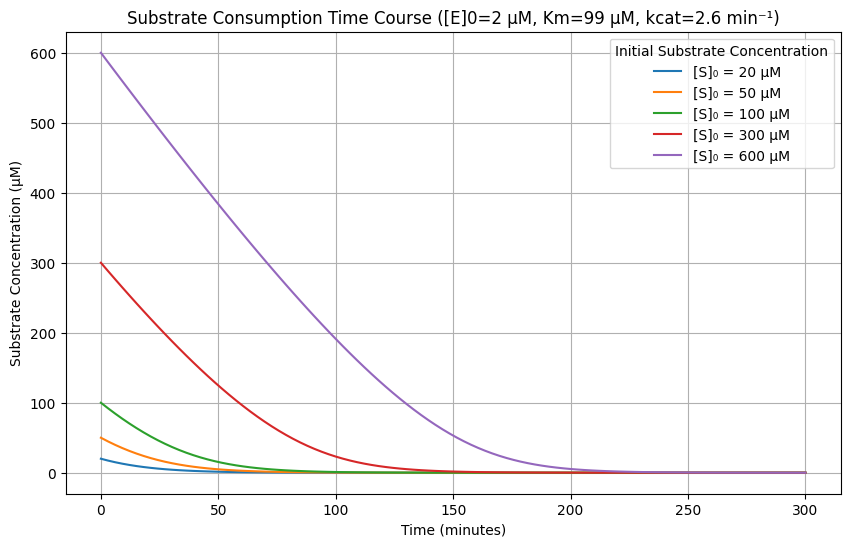

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Given kinetic parameters
kcat = 2.6  # per minute (min^-1)
Km = 99     # micromolar

# Given enzyme concentration
enzyme_concentration_micromolar = 2 # micromolar

# Calculate Vmax (in micromolar per minute)
Vmax_concentration_rate = kcat * enzyme_concentration_micromolar # µM / min

# List of initial substrate concentrations to plot
initial_substrate_concentrations_micromolar = [20, 50, 100, 300, 600] # micromolar

# Time points for the plot (1 hour = 60 minutes)
time_points_min = np.linspace(0, 300, 100) # Simulate over 100 small time steps

# Create the figure and axes for the plot
plt.figure(figsize=(10, 6))

# Loop through each initial substrate concentration
for initial_substrate_concentration in initial_substrate_concentrations_micromolar:

    # Simulate substrate consumption over time for the current initial concentration
    substrate_concentration_micromolar = [initial_substrate_concentration]
    current_substrate_concentration = initial_substrate_concentration

    # Use a simple forward Euler integration for simulation
    time_step_min = time_points_min[1] - time_points_min[0]

    for i in range(1, len(time_points_min)):
        # Calculate the reaction rate at the current substrate concentration (µM/min)
        reaction_rate_micromolar_per_min = (Vmax_concentration_rate * current_substrate_concentration) / (Km + current_substrate_concentration)

        # Calculate the change in substrate concentration in this time step (µM)
        change_in_substrate_concentration = reaction_rate_micromolar_per_min * time_step_min

        # Update the current substrate concentration (µM)
        current_substrate_concentration -= change_in_substrate_concentration

        # Ensure substrate concentration doesn't go below zero
        if current_substrate_concentration < 0:
            current_substrate_concentration = 0

        # Store the updated substrate concentration
        substrate_concentration_micromolar.append(current_substrate_concentration)

    # Plot the time course for the current initial concentration
    plt.plot(time_points_min, substrate_concentration_micromolar, label=f'[S]₀ = {initial_substrate_concentration} µM')

plt.xlabel('Time (minutes)')
plt.ylabel('Substrate Concentration (µM)')
plt.title(f'Substrate Consumption Time Course ([E]0={enzyme_concentration_micromolar} µM, Km={Km} µM, kcat={kcat} min⁻¹)')
plt.grid(True)
plt.legend(title='Initial Substrate Concentration') # Add a legend to distinguish lines
plt.show()

In [3]:
# Import Yutian data in csv to dataframe
import pandas as pd

# Define a function that takes a list of file names as input
def read_triplicate_data(filename):
  from google.colab import drive
  drive.mount('/content/drive')
  # Open the CSV file
  file = '/content/drive/MyDrive/' + filename
  open(file, 'r', newline='')

  # Initialize an empty data frame
  #df = pd.DataFrame()
  # Loop through the file names
  df = pd.read_csv(file, sep =';', index_col=0, header=0)
  # Append the data frame to the main data frame
  # Return the result data frame
  #df.columns = df.iloc[0]
  #df.drop(df.index[5]
  return df

df = read_triplicate_data('ASMT_Yutian_assay_1.csv').T

Mounted at /content/drive


In [4]:
df

Time [s],Time [s],0,60.013,120.035,180.045,240.057,300.069,360.085,420.107,480.124,...,3000.723,3060.738,3120.754,3180.771,3240.791,3300.817,3360.834,3420.853,3480.879,3540.895
20,20.0,0.7075,0.7064,0.7020,0.6993,0.6961,0.6936,0.6909,0.6894,0.6881,...,0.6099,0.6078,0.6054,0.6034,0.6010,0.5987,0.5964,0.5942,0.5916,0.5892
20.1,20.0,0.7318,0.7270,0.7222,0.7195,0.7171,0.7145,0.7110,0.7088,0.7069,...,0.6266,0.6245,0.6233,0.6212,0.6194,0.6177,0.6159,0.6139,0.6122,0.6101
20.2,20.0,0.7293,0.7256,0.7210,0.7195,0.7159,0.7135,0.7118,0.7092,0.7068,...,0.6235,0.6221,0.6201,0.6179,0.6162,0.6142,0.6125,0.6102,0.6088,0.6063
50,50.0,0.7517,0.7456,0.7395,0.7362,0.7322,0.7289,0.7252,0.7218,0.7189,...,0.6101,0.6078,0.6054,0.6032,0.6009,0.5985,0.5963,0.5942,0.5915,0.5890
50.1,50.0,0.7177,0.7124,0.7066,0.7030,0.6980,0.6945,0.6911,0.6876,0.6852,...,0.5750,0.5725,0.5699,0.5667,0.5641,0.5616,0.5592,0.5569,0.5543,0.5514
50.2,50.0,0.7429,0.7351,0.7306,0.7268,0.7254,0.7198,0.7156,0.7123,0.7087,...,0.5976,0.5955,0.5926,0.5900,0.5869,0.5843,0.5814,0.5788,0.5763,0.5741
100,100.0,0.7545,0.7459,0.7409,0.7371,0.7322,0.7277,0.7243,0.7193,0.7156,...,0.5691,0.5665,0.5634,0.5600,0.5568,0.5534,0.5503,0.5474,0.5444,0.5414
100.1,100.0,0.7288,0.7233,0.7191,0.7148,0.7103,0.7069,0.7019,0.6982,0.6948,...,0.5536,0.5515,0.5488,0.5444,0.5412,0.5380,0.5349,0.5313,0.5289,0.5259
100.2,100.0,0.7536,0.7453,0.7399,0.7354,0.7311,0.7264,0.7221,0.7181,0.7142,...,0.5698,0.5665,0.5640,0.5607,0.5571,0.5540,0.5506,0.5472,0.5440,0.5410
300,300.0,0.7523,0.7430,0.7361,0.7261,0.7199,0.7129,0.7057,0.6994,0.6939,...,0.4757,0.4704,0.4658,0.4607,0.4557,0.4510,0.4460,0.4410,0.4360,0.4312


In [5]:
import pandas as pd

# Assuming your column labels are strings like '0s', '60s', '120s', etc.
# And the first column is NOT a time value

# Select the columns that represent time
time_column_labels = df.columns[1:]

# Create a new list of converted column labels
new_column_labels = df.columns[:1].tolist() # Keep the first label as is

for label in time_column_labels:
    try:
        # Extract the numeric part and convert to float
        time_in_seconds = float(label.replace('s', ''))
        # Convert to minutes
        time_in_minutes = time_in_seconds / 60
        new_column_labels.append(time_in_minutes)
    except ValueError:
        # Handle cases where the label is not in the expected format
        print(f"Warning: Could not convert '{label}' to a numeric time value. Keeping original label.")
        new_column_labels.append(label)

# Assign the new column labels to the DataFrame
df.columns = new_column_labels

print(df.columns)

Index([        'Time [s]',                0.0, 1.0002166666666665,
        2.000583333333333, 3.0007499999999996,            4.00095,
                  5.00115,  6.001416666666667,  7.001783333333334,
        8.002066666666668,             9.0024, 10.002516666666667,
                  11.0028, 12.003016666666667, 13.003133333333333,
       14.003449999999999, 15.003633333333333, 16.003933333333332,
                  17.0041, 18.004399999999997, 19.004566666666665,
       20.004883333333332, 21.005066666666668, 22.005283333333335,
                  23.0056, 24.005733333333335, 25.006183333333336,
                  26.0063,  27.00658333333333, 28.006899999999998,
       29.007150000000003,            30.0073, 31.007533333333335,
        32.00761666666667, 33.007783333333336, 34.007866666666665,
        35.00808333333334,  36.00836666666667, 37.008633333333336,
       38.008900000000004,  39.00906666666666,            40.0093,
        41.00953333333334,  42.00983333333333,           43.01

In [6]:
# Select the first 15 rows with the absorbances measured in the presence of a methyltransferase
df_first_15 = df.head(15)

# Now group the first 15 rows by the first column and calculate the mean
grouped_first_15 = df_first_15.groupby(df_first_15.columns[0])
averaged_first_15 = grouped_first_15.mean()

# You can now work with 'averaged_first_15' which contains the averages
# for the groups within the first 15 rows of your original DataFrame.

averaged_first_15

,0.000000,1.000217,2.000583,3.000750,4.000950,5.001150,6.001417,7.001783,8.002067,9.002400,...,50.012050,51.012300,52.012567,53.012850,54.013183,55.013617,56.013900,57.014217,58.014650,59.014917
Time [s],,,,,,,,,,,,,,,,,,,,,
20.0,0.722867,0.719667,0.715067,0.712767,0.709700,0.707200,0.704567,0.702467,0.700600,0.698267,...,0.620000,0.618133,0.616267,0.614167,0.612200,0.610200,0.608267,0.606100,0.604200,0.601867
50.0,0.737433,0.731033,0.725567,0.722000,0.718533,0.714400,0.710633,0.707233,0.704267,0.700900,...,0.594233,0.591933,0.589300,0.586633,0.583967,0.581467,0.578967,0.576633,0.574033,0.571500
100.0,0.745633,0.738167,0.733300,0.729100,0.724533,0.720333,0.716100,0.711867,0.708200,0.704167,...,0.564167,0.561500,0.558733,0.555033,0.551700,0.548467,0.545267,0.541967,0.539100,0.536100
300.0,0.758000,0.750333,0.742000,0.734033,0.727567,0.721367,0.714467,0.708067,0.702100,0.696533,...,0.481567,0.476300,0.471600,0.466633,0.461533,0.456833,0.451700,0.446900,0.441967,0.437167
600.0,0.757367,0.752367,0.746000,0.734733,0.727267,0.720333,0.713933,0.708033,0.701733,0.695500,...,0.447033,0.441000,0.435200,0.429500,0.423567,0.418100,0.411800,0.406433,0.400467,0.395200


In [7]:
#Calculate standard deviations
esds_first_15 = grouped_first_15.std()
esds_first_15

,0.000000,1.000217,2.000583,3.000750,4.000950,5.001150,6.001417,7.001783,8.002067,9.002400,...,50.012050,51.012300,52.012567,53.012850,54.013183,55.013617,56.013900,57.014217,58.014650,59.014917
Time [s],,,,,,,,,,,,,,,,,,,,,
20.0,0.013367,0.011511,0.011332,0.011662,0.011793,0.011789,0.011842,0.011318,0.010825,0.011143,...,0.008883,0.009029,0.009546,0.009469,0.009831,0.010112,0.010416,0.010470,0.011044,0.011133
50.0,0.017647,0.016969,0.017018,0.017113,0.018105,0.017824,0.017584,0.017654,0.017282,0.018308,...,0.017791,0.017918,0.017979,0.018481,0.018575,0.018612,0.018669,0.018744,0.018703,0.018934
100.0,0.014585,0.012878,0.012308,0.012413,0.012339,0.011652,0.012347,0.011851,0.011626,0.011623,...,0.009158,0.008660,0.008608,0.009215,0.009095,0.009069,0.008979,0.009238,0.008836,0.008836
300.0,0.004943,0.006371,0.005122,0.006897,0.006688,0.007387,0.007711,0.007617,0.007136,0.007181,...,0.006004,0.006110,0.006065,0.006161,0.006062,0.006062,0.005966,0.006165,0.006104,0.006213
600.0,0.005169,0.011042,0.008543,0.009751,0.010129,0.009363,0.009223,0.008643,0.008112,0.008581,...,0.017709,0.017392,0.017479,0.017905,0.017928,0.017359,0.017754,0.017997,0.017638,0.017627


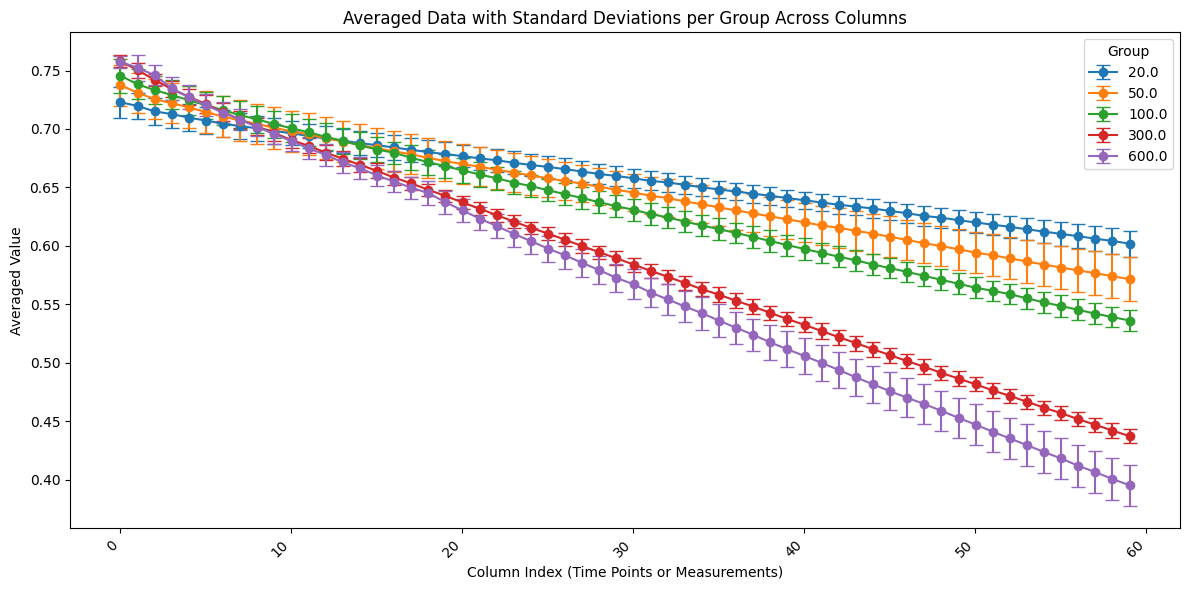

In [8]:
import matplotlib.pyplot as plt

# Assuming you have 'averaged_first_15' and 'esds_first_15' DataFrames

plt.figure(figsize=(12, 6))

# Get the x-values (column names)
x_values = averaged_first_15.columns

# Iterate through each row (each group) and plot a line with error bars
for index, row in averaged_first_15.iterrows():
    # Get the y-values (means) and y-errors (standard deviations) for the current group
    y_values = row.values
    y_errors = esds_first_15.loc[index].values # Get the corresponding errors for the current group

    # Plot with error bars
    plt.errorbar(x=x_values, y=y_values, yerr=y_errors, marker='o', capsize=5, label=index)

plt.xlabel('Column Index (Time Points or Measurements)')
plt.ylabel('Averaged Value')
plt.title('Averaged Data with Standard Deviations per Group Across Columns')
plt.legend(title='Group')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they are long
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

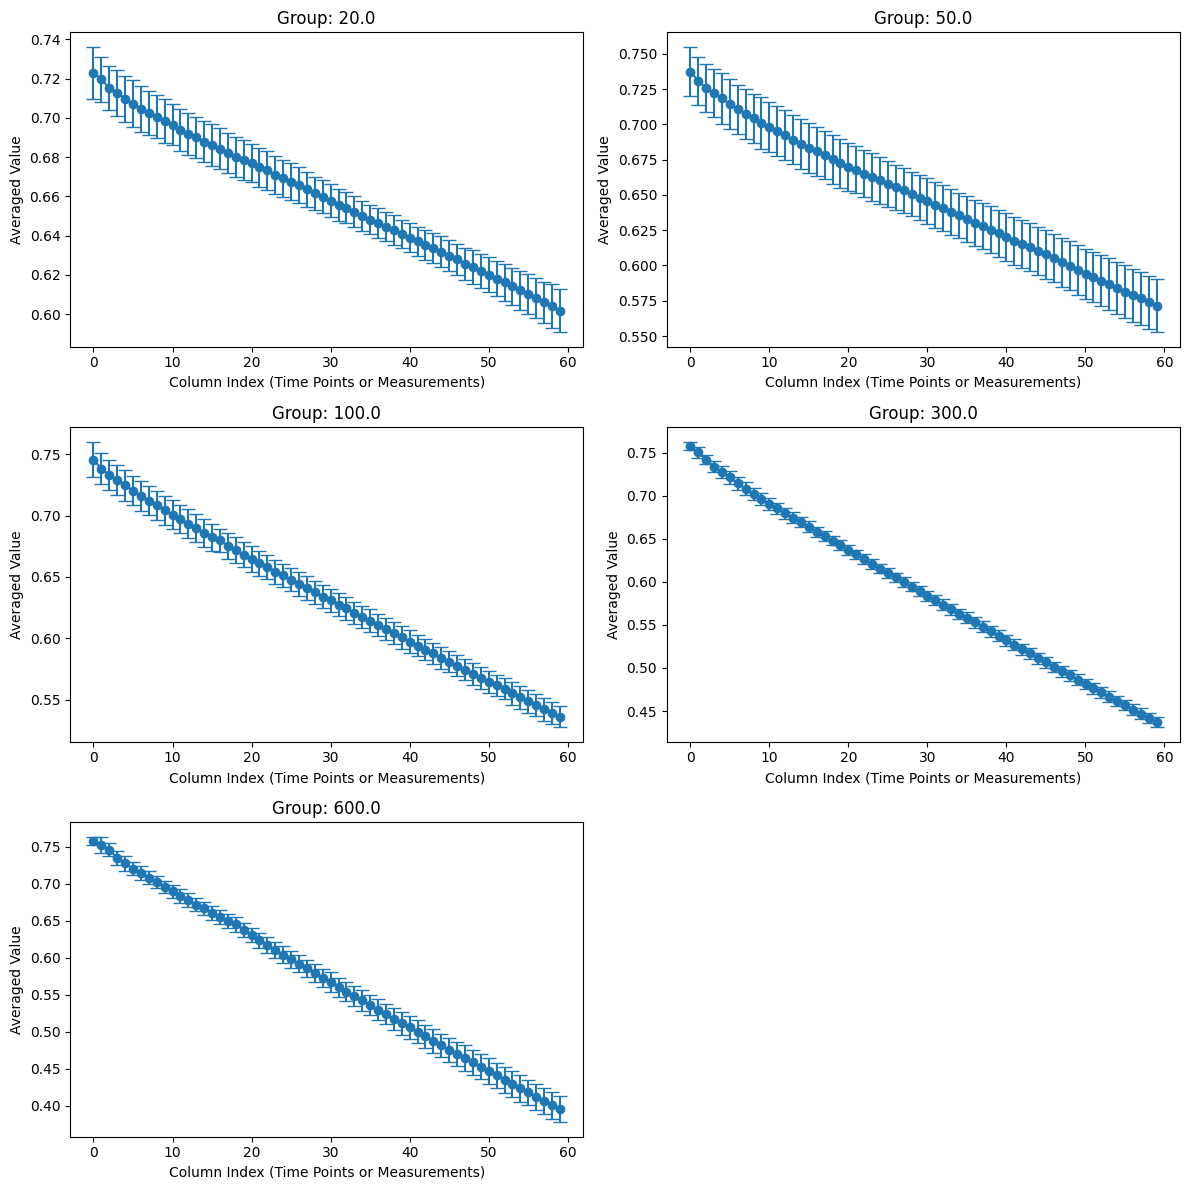

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have 'averaged_first_15' and 'esds_first_15' DataFrames

# Determine the number of rows (groups) you want to plot
num_rows_to_plot = averaged_first_15.shape[0]

# Calculate the number of rows and columns for your subplot grid
# Adjust this based on how you want to arrange the plots (e.g., 2 columns of plots)
num_subplot_rows = int(num_rows_to_plot / 2) + (num_rows_to_plot % 2 > 0)
num_subplot_cols = 2

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_subplot_rows, num_subplot_cols, figsize=(12, num_subplot_rows * 4)) # Adjust figsize

# Flatten the axes array if you have multiple rows of subplots
axes = axes.flatten()

# Get the x-values (column names - these will be the same for all plots)
x_values = averaged_first_15.columns

# Loop through each row (each group) and create a subplot
for i, (index, row) in enumerate(averaged_first_15.iterrows()):
    # Get the y-values (means) and y-errors (standard deviations) for the current group
    y_values = row.values
    y_errors = esds_first_15.loc[index].values # Get the corresponding errors for the current group

    # Plot with error bars on the current subplot axis
    axes[i].errorbar(x=x_values, y=y_values, yerr=y_errors, marker='o', capsize=5)

    # Set title and labels for the current subplot
    axes[i].set_title(f'Group: {index}')
    axes[i].set_xlabel('Column Index (Time Points or Measurements)')
    axes[i].set_ylabel('Averaged Value')

# Remove any unused subplots if the number of groups is odd
if num_rows_to_plot < len(axes):
    for j in range(num_rows_to_plot, len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the panel of plots
plt.show()

In [10]:
# Assuming 'df' is your DataFrame

# Select rows from index 16 to 31 (0-based indexing) for grouping and averaging
rows_to_process = df.iloc[16:32, :]

# Group the selected rows by their first column and calculate the mean
grouped_specific_rows = rows_to_process.groupby(rows_to_process.columns[0])
averaged_specific_rows = grouped_specific_rows.mean()

# You can now work with 'averaged_specific_rows'

print(averaged_specific_rows)

          0.000000   1.000217   2.000583   3.000750   4.000950   5.001150   \
Time [s]                                                                     
20.0       0.797200   0.794067   0.790533   0.786867   0.784233   0.782100   
50.0       0.739533   0.734800   0.730700   0.727900   0.725367   0.722033   
100.0      0.744867   0.735800   0.729700   0.725600   0.721933   0.718633   
300.0      0.793100   0.779300   0.768967   0.761900   0.756033   0.751400   
600.0      0.771167   0.766333   0.759900   0.755433   0.751433   0.747833   

          6.001417   7.001783   8.002067   9.002400   ...  50.012050  \
Time [s]                                              ...              
20.0       0.778933   0.777000   0.775533   0.772800  ...   0.707567   
50.0       0.721100   0.718233   0.715533   0.713500  ...   0.644900   
100.0      0.716000   0.713600   0.709933   0.708000  ...   0.630033   
300.0      0.746500   0.742200   0.738167   0.735900  ...   0.652800   
600.0      0.745167  

In [11]:
# Assuming 'df' is your DataFrame

# Select rows from index 16 to 31 (0-based indexing)
rows_to_process = df.iloc[16:32, :]

# Group the selected rows by their first column
grouped_specific_rows = rows_to_process.groupby(rows_to_process.columns[0])

# Calculate the mean for each group (as before)
averaged_specific_rows = grouped_specific_rows.mean()

# Calculate the standard deviation (errors) for each group
esds_specific_rows = grouped_specific_rows.std()

# Now 'esds_specific_rows' is a DataFrame containing the standard deviations
# for each group within rows 17-32.

print(esds_specific_rows)

          0.000000   1.000217   2.000583   3.000750   4.000950   5.001150   \
Time [s]                                                                     
20.0       0.015470   0.015813   0.016013   0.014926   0.015007   0.015301   
50.0       0.015859   0.016470   0.016505   0.017078   0.017434   0.017806   
100.0      0.054515   0.046349   0.043729   0.042062   0.041108   0.040980   
300.0      0.016086   0.015629   0.014043   0.013260   0.013272   0.013105   
600.0      0.003213   0.004067   0.005892   0.007600   0.008972   0.009886   

          6.001417   7.001783   8.002067   9.002400   ...  50.012050  \
Time [s]                                              ...              
20.0       0.015556   0.015617   0.015499   0.015932  ...   0.013530   
50.0       0.017030   0.017400   0.017664   0.017671  ...   0.021336   
100.0      0.039855   0.039838   0.039162   0.039368  ...   0.038359   
300.0      0.012560   0.013686   0.013835   0.013167  ...   0.015175   
600.0      0.010538  

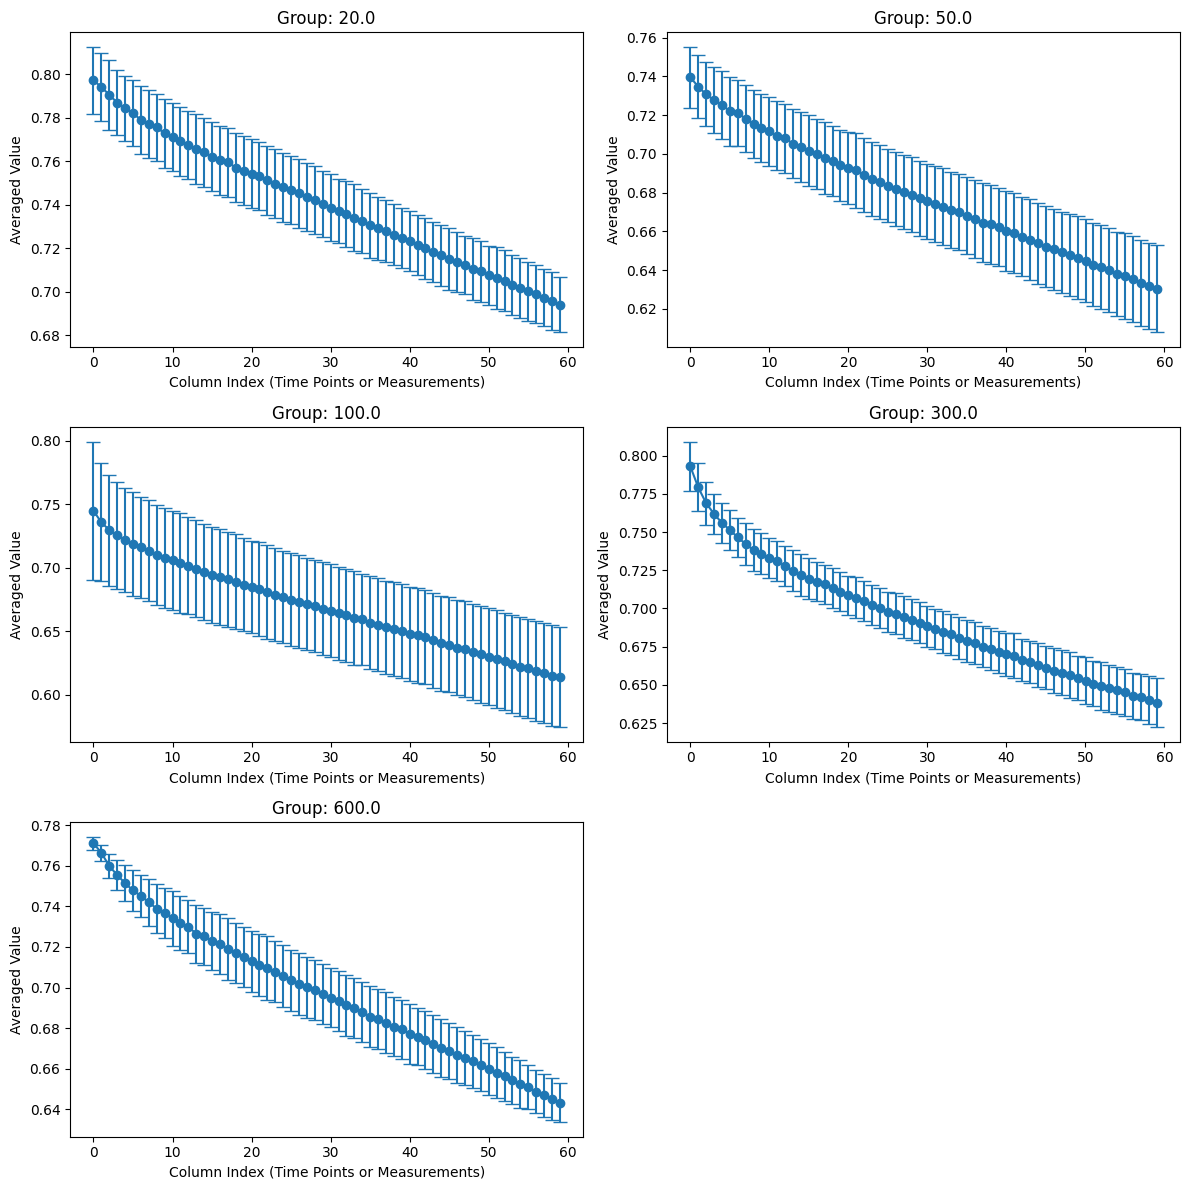

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have 'averaged_specific_rows' and 'esds_specific_rows' DataFrames
# calculated from rows 17-32 of your original data

# Determine the number of rows (groups) you want to plot
num_rows_to_plot = averaged_specific_rows.shape[0]

# Calculate the number of rows and columns for your subplot grid
# Adjust this based on how you want to arrange the plots (e.g., 2 columns of plots)
num_subplot_rows = int(num_rows_to_plot / 2) + (num_rows_to_plot % 2 > 0)
num_subplot_cols = 2

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_subplot_rows, num_subplot_cols, figsize=(12, num_subplot_rows * 4)) # Adjust figsize

# Flatten the axes array if you have multiple rows of subplots
axes = axes.flatten()

# Get the x-values (column names - these will be the same for all plots)
x_values = averaged_specific_rows.columns

# Loop through each row (each group) and create a subplot
for i, (index, row) in enumerate(averaged_specific_rows.iterrows()):
    # Get the y-values (means) and y-errors (standard deviations) for the current group
    y_values = row.values
    y_errors = esds_specific_rows.loc[index].values # Get the corresponding errors for the current group

    # Plot with error bars on the current subplot axis
    axes[i].errorbar(x=x_values, y=y_values, yerr=y_errors, marker='o', capsize=5)

    # Set title and labels for the current subplot
    axes[i].set_title(f'Group: {index}')
    axes[i].set_xlabel('Column Index (Time Points or Measurements)')
    axes[i].set_ylabel('Averaged Value')

# Remove any unused subplots if the number of groups is odd
if num_rows_to_plot < len(axes):
    for j in range(num_rows_to_plot, len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the panel of plots
plt.show()

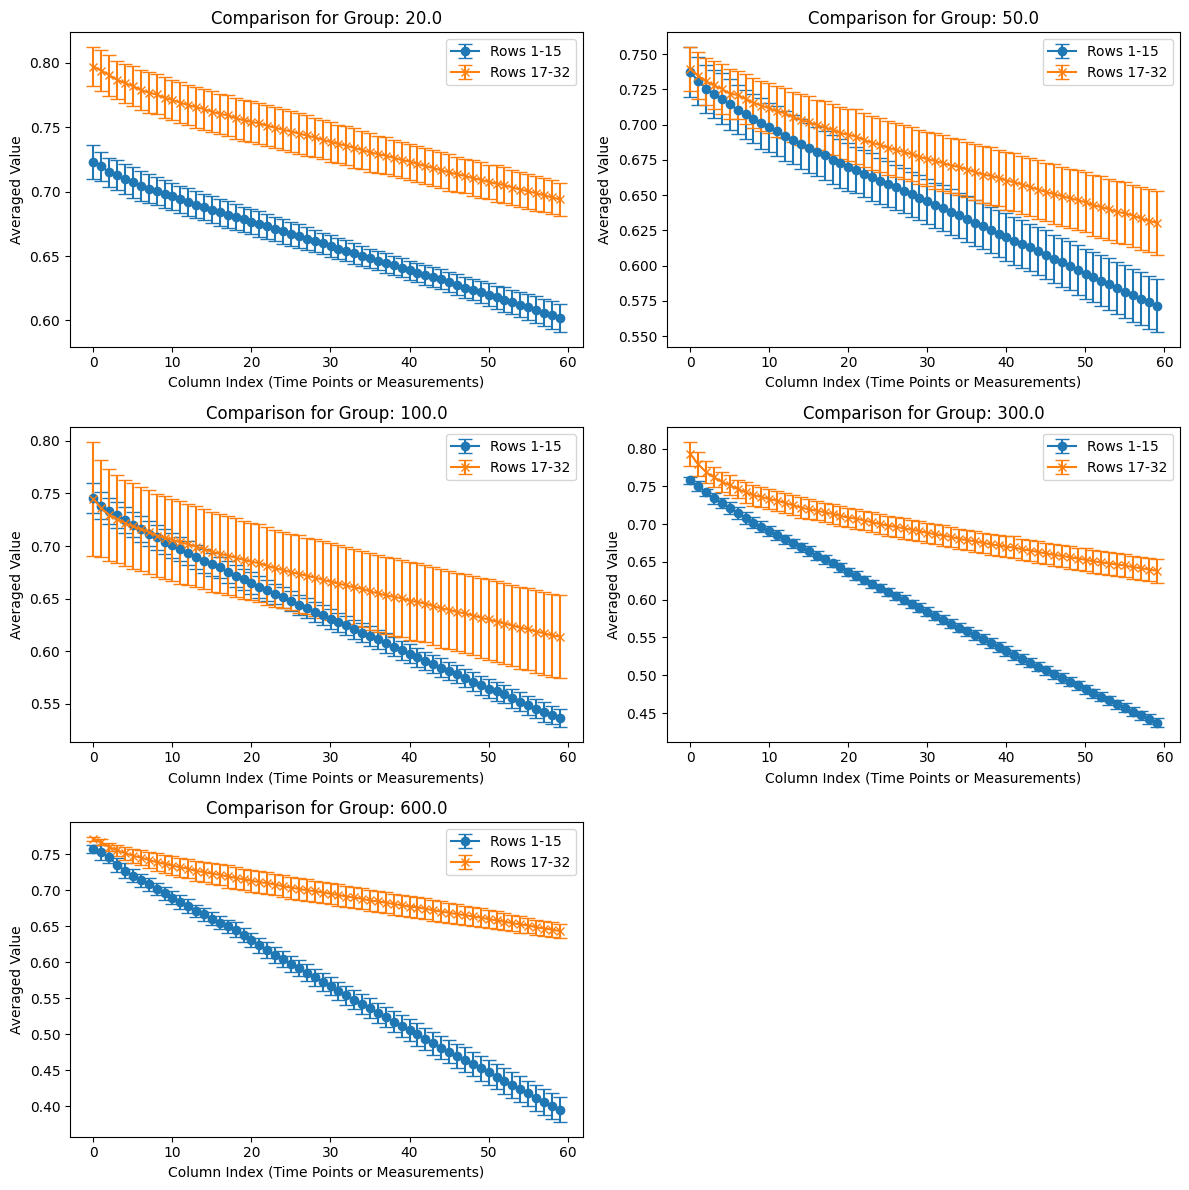

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have 'averaged_first_15', 'esds_first_15',
# 'averaged_specific_rows', and 'esds_specific_rows' DataFrames

# Get the common groups (assuming they are the same in both DataFrames)
common_groups = averaged_first_15.index.intersection(averaged_specific_rows.index)

# Determine the number of common groups to plot
num_common_groups = len(common_groups)

# Calculate the number of rows and columns for your subplot grid
num_subplot_rows = int(num_common_groups / 2) + (num_common_groups % 2 > 0)
num_subplot_cols = 2

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_subplot_rows, num_subplot_cols, figsize=(12, num_subplot_rows * 4))
axes = axes.flatten()

# Get the x-values (column names - these should be consistent)
x_values = averaged_first_15.columns

# Loop through each common group and create a subplot
for i, group in enumerate(common_groups):
    # Get data for the current group from averaged_first_15
    y_values_15 = averaged_first_15.loc[group].values
    y_errors_15 = esds_first_15.loc[group].values

    # Get data for the current group from averaged_specific_rows
    y_values_spec = averaged_specific_rows.loc[group].values
    y_errors_spec = esds_specific_rows.loc[group].values

    # Plot data from the first 15 rows
    axes[i].errorbar(x=x_values, y=y_values_15, yerr=y_errors_15, marker='o', capsize=5, label='Rows 1-15')

    # Plot data from rows 17-32
    axes[i].errorbar(x=x_values, y=y_values_spec, yerr=y_errors_spec, marker='x', capsize=5, label='Rows 17-32')

    # Set title and labels for the current subplot
    axes[i].set_title(f'Comparison for Group: {group}')
    axes[i].set_xlabel('Column Index (Time Points or Measurements)')
    axes[i].set_ylabel('Averaged Value')
    axes[i].legend() # Add legend to each subplot

# Remove any unused subplots
if num_common_groups < len(axes):
    for j in range(num_common_groups, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

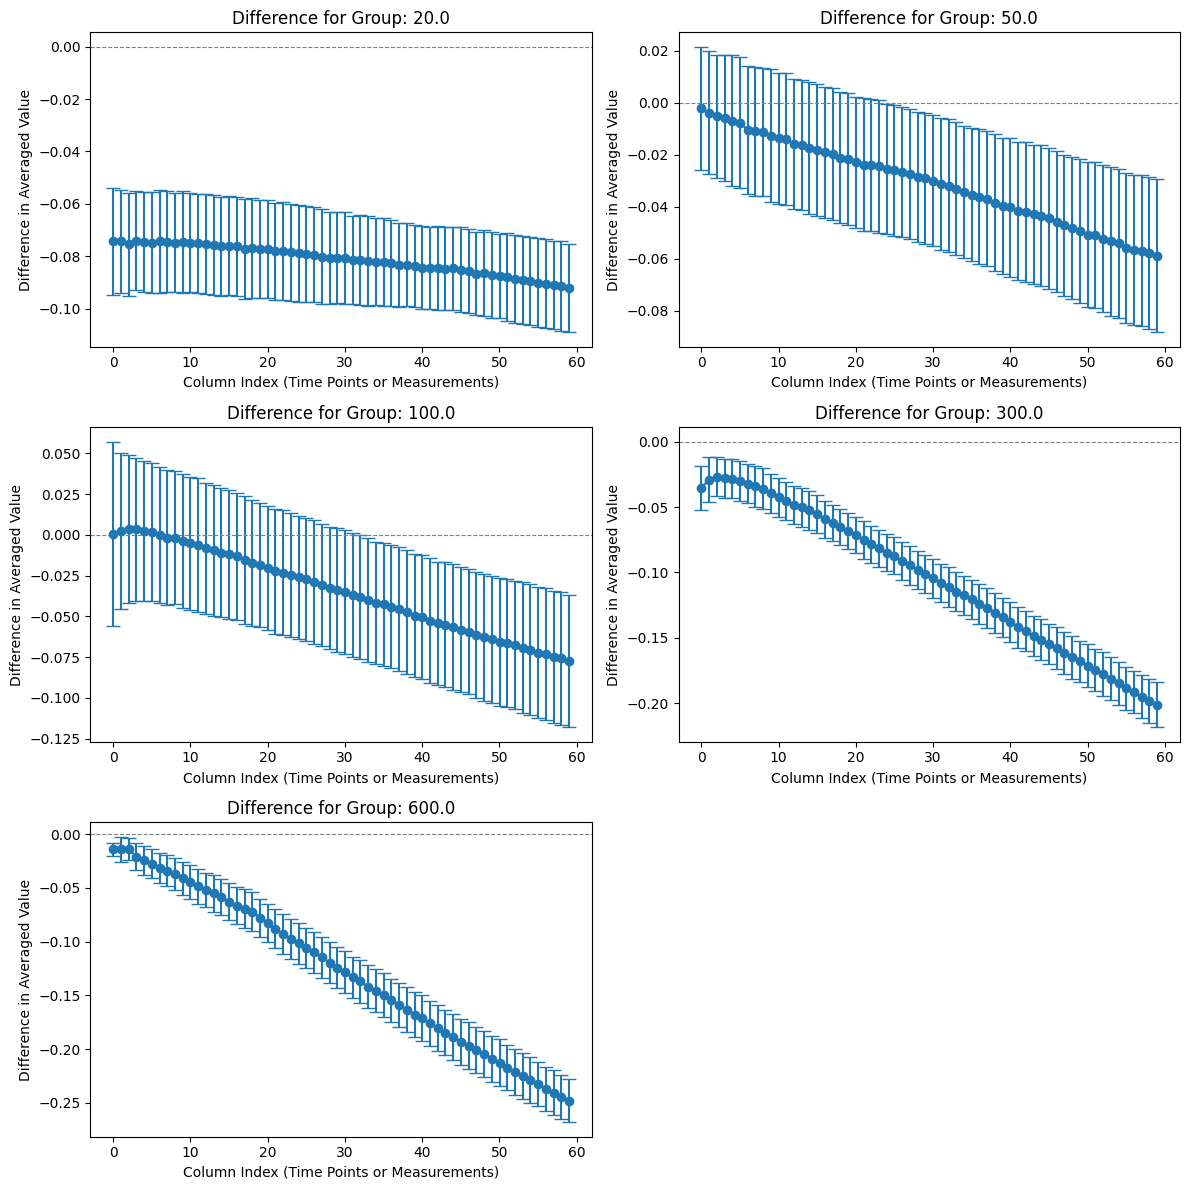

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have 'averaged_first_15', 'esds_first_15',
# 'averaged_specific_rows', and 'esds_specific_rows' DataFrames

# Get the common groups (assuming they are the same in both DataFrames)
common_groups = averaged_first_15.index.intersection(averaged_specific_rows.index)

# Calculate the difference between the averaged values
# Assuming you want averaged_first_15 - averaged_specific_rows
difference_df = averaged_first_15.loc[common_groups] - averaged_specific_rows.loc[common_groups]

# Calculate the combined error for the difference
# Using the formula: Error_difference = sqrt(Error_1^2 + Error_2^2)
# Assuming the standard deviations are directly from esds_first_15 and esds_specific_rows
error_difference_df = np.sqrt(esds_first_15.loc[common_groups]**2 + esds_specific_rows.loc[common_groups]**2)

# Determine the number of common groups to plot
num_common_groups = len(common_groups)

# Calculate the number of rows and columns for your subplot grid
num_subplot_rows = int(num_common_groups / 2) + (num_common_groups % 2 > 0)
num_subplot_cols = 2

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_subplot_rows, num_subplot_cols, figsize=(12, num_subplot_rows * 4))
axes = axes.flatten()

# Get the x-values (column names - these should be consistent)
x_values = difference_df.columns

# Loop through each common group and create a subplot of the differences
for i, group in enumerate(common_groups):
    # Get the difference values and their errors for the current group
    difference_values = difference_df.loc[group].values
    difference_errors = error_difference_df.loc[group].values

    # Plot the differences with error bars
    axes[i].errorbar(x=x_values, y=difference_values, yerr=difference_errors, marker='o', capsize=5)

    # Add a horizontal line at y=0 to indicate no difference
    axes[i].axhline(0, color='grey', linestyle='--', linewidth=0.8)

    # Set title and labels for the current subplot
    axes[i].set_title(f'Difference for Group: {group}')
    axes[i].set_xlabel('Column Index (Time Points or Measurements)')
    axes[i].set_ylabel('Difference in Averaged Value')

# Remove any unused subplots
if num_common_groups < len(axes):
    for j in range(num_common_groups, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
from scipy import stats
import pandas as pd

# Assuming you have 'difference_df' and 'error_difference_df'

# Iterate through each group in the difference data
for group_name, difference_row in difference_df.iterrows():
    # Get the difference value at the first and last columns for the current group
    first_difference = difference_row.iloc[0]
    last_difference = difference_row.iloc[-1]

    # To perform a paired t-test, you need the original data points
    # or a way to calculate the variance of the difference between
    # the first and last differences.

    # If you were to perform a t-test on the difference of differences,
    # you would need the standard error of that difference.

    # A simpler interpretation with your current data:
    # Check if the confidence intervals for the first and last differences overlap with zero.
    # If the confidence interval for the first difference *includes* zero,
    # and the confidence interval for the last difference *does not include* zero (or vice versa),
    # it suggests a change in significance relative to zero over time.

    print(f"Group: {group_name}")
    print(f"  Difference at first time point: {first_difference:.4f}")
    print(f"  Difference at last time point: {last_difference:.4f}")

    # You could also compare the confidence intervals:

    # Assuming error_difference_df provides the standard error of the differences
    # (If not, you would need to calculate it from the original data)
    try:
        first_error = error_difference_df.loc[group_name].iloc[0]
        last_error = error_difference_df.loc[group_name].iloc[-1]

        # Approximate a 95% confidence interval for the first and last differences
        # using a z-score (approximation - ideally use t-distribution with correct degrees of freedom)
        z_score_95_ci = 1.96

        ci_first_lower = first_difference - z_score_95_ci * first_error
        ci_first_upper = first_difference + z_score_95_ci * first_error

        ci_last_lower = last_difference - z_score_95_ci * last_error
        ci_last_upper = last_difference + z_score_95_ci * last_error

        print(f"  Approx 95% CI for first difference: [{ci_first_lower:.4f}, {ci_first_upper:.4f}]")
        print(f"  Approx 95% CI for last difference: [{ci_last_lower:.4f}, {ci_last_upper:.4f}]")

        # Assess if the confidence intervals overlap with zero
        is_first_significant = not (ci_first_lower <= 0 <= ci_first_upper)
        is_last_significant = not (ci_last_lower <= 0 <= ci_last_upper)

        print(f"  First difference significant from zero: {is_first_significant}")
        print(f"  Last difference significant from zero: {is_last_significant}")

        # To formally test if the first and last differences are different from *each other*,
        # you would need to perform a statistical test on the raw data or
        # calculate the standard error of the difference between the first and last differences.

    except IndexError:
        print("  Could not retrieve error values for first or last difference.")


# To perform a more direct test of whether the first difference is different from the last difference,
# you would need to go back to your original data and compare the values at the first and last
# time points for each original dataset (Rows 1-15 and Rows 17-32) and then compare
# the *change* over time between the two datasets. This involves a more complex
# statistical model (like a repeated measures ANOVA or a linear mixed-effects model
# looking at the interaction between time and dataset).

# If you can assume that the standard errors in error_difference_df are independent,
# you could potentially calculate the standard error of the difference between the
# first and last differences as sqrt(SE_first^2 + SE_last^2). Then a t-test
# could be performed on the difference of differences / its standard error.

Group: 20.0
  Difference at first time point: -0.0743
  Difference at last time point: -0.0922
  Approx 95% CI for first difference: [-0.1144, -0.0343]
  Approx 95% CI for last difference: [-0.1254, -0.0589]
  First difference significant from zero: True
  Last difference significant from zero: True
Group: 50.0
  Difference at first time point: -0.0021
  Difference at last time point: -0.0589
  Approx 95% CI for first difference: [-0.0486, 0.0444]
  Approx 95% CI for last difference: [-0.1165, -0.0012]
  First difference significant from zero: False
  Last difference significant from zero: True
Group: 100.0
  Difference at first time point: 0.0008
  Difference at last time point: -0.0777
  Approx 95% CI for first difference: [-0.1098, 0.1114]
  Approx 95% CI for last difference: [-0.1571, 0.0018]
  First difference significant from zero: False
  Last difference significant from zero: False
Group: 300.0
  Difference at first time point: -0.0351
  Difference at last time point: -0.2011
 

In [16]:
from scipy import stats
import pandas as pd
import numpy as np

# Assuming you have 'difference_df' and 'error_difference_df'

# Iterate through each group in the difference data
for group_name, difference_row in difference_df.iterrows():
    try:
        # Get the difference value at the first and last columns for the current group
        first_difference = difference_row.iloc[0]
        last_difference = difference_row.iloc[-1]

        # Get the standard error for the first and last differences
        # Assuming error_difference_df provides the standard error
        first_error = error_difference_df.loc[group_name].iloc[0]
        last_error = error_difference_df.loc[group_name].iloc[-1]

        # Calculate the "change in difference"
        change_in_difference = last_difference - first_difference

        # Estimate the standard error of the "change in difference"
        # Assuming independence of errors at the two time points
        se_change_in_difference = np.sqrt(first_error**2 + last_error**2)

        # Perform a t-test on the "change in difference" against zero
        # Degrees of freedom would ideally be based on the original sample sizes.
        # For simplicity with averaged data, you might use an approximate approach.
        # A simple t-statistic is: t = change_in_difference / se_change_in_difference

        # To get a p-value, you need the t-distribution and degrees of freedom.
        # Let's provide the t-statistic and the change value.
        # A formal p-value calculation without original data is less precise.

        print(f"Group: {group_name}")
        print(f"  Change in Difference (Last - First): {change_in_difference:.4f}")
        print(f"  Estimated SE of Change in Difference: {se_change_in_difference:.4f}")

        # Approximate a t-statistic
        if se_change_in_difference > 0:
             t_statistic = change_in_difference / se_change_in_difference
             print(f"  Approximate t-statistic: {t_statistic:.4f}")
        else:
             print("  Cannot calculate t-statistic (SE is zero)")

        # To get a p-value, you would need to specify degrees of freedom.
        # If your original groups were triplicates (n=3), the degrees of freedom
        # for the difference of two means with equal variances is approximately 2*(n-1) = 4.
        # However, the standard error calculation here is an approximation.

        # A more robust approach is to compare the confidence intervals of the first and last differences.
        # If the confidence interval of the first difference does not overlap with the confidence interval
        # of the last difference, it suggests a statistically significant change in the difference over time.

        # Let's print approximate 95% confidence intervals for the change in difference:
        # Assuming a t-value for 95% confidence and appropriate degrees of freedom.
        # Using z=1.96 as an approximation:
        z_score_95_ci = 1.96
        ci_change_lower = change_in_difference - z_score_95_ci * se_change_in_difference
        ci_change_upper = change_in_difference + z_score_95_ci * se_change_in_difference
        print(f"  Approx 95% CI for Change in Difference: [{ci_change_lower:.4f}, {ci_change_upper:.4f}]")

        # If the confidence interval does not include zero, the change is significant.
        is_change_significant = not (ci_change_lower <= 0 <= ci_change_upper)
        print(f"  Change in difference significant from zero: {is_change_significant}")


    except IndexError:
        print("  Could not retrieve error values for first or last difference for this group.")
    except Exception as e:
        print(f"  An error occurred for group {group_name}: {e}")

Group: 20.0
  Change in Difference (Last - First): -0.0178
  Estimated SE of Change in Difference: 0.0266
  Approximate t-statistic: -0.6714
  Approx 95% CI for Change in Difference: [-0.0699, 0.0342]
  Change in difference significant from zero: False
Group: 50.0
  Change in Difference (Last - First): -0.0568
  Estimated SE of Change in Difference: 0.0378
  Approximate t-statistic: -1.5024
  Approx 95% CI for Change in Difference: [-0.1308, 0.0173]
  Change in difference significant from zero: False
Group: 100.0
  Change in Difference (Last - First): -0.0784
  Estimated SE of Change in Difference: 0.0695
  Approximate t-statistic: -1.1289
  Approx 95% CI for Change in Difference: [-0.2146, 0.0577]
  Change in difference significant from zero: False
Group: 300.0
  Change in Difference (Last - First): -0.1660
  Estimated SE of Change in Difference: 0.0241
  Approximate t-statistic: -6.8776
  Approx 95% CI for Change in Difference: [-0.2134, -0.1187]
  Change in difference significant fr

In [19]:
import pandas as pd

# Assuming you have the 'difference_df' DataFrame (with absorbance difference values)
# And 'error_difference_df' DataFrame (with absorbance difference errors)

# Given values for the coupled assay
molar_extinction_coefficient = 6220  # per M per cm
path_length = 1  # cm

# --- Step 1: Convert absorbance to concentration of colored product formed ---

# Handle the time zero blank by subtracting the first column's absorbance
absorbance_at_time_zero = difference_df.iloc[:, 0]
change_in_absorbance = difference_df.sub(absorbance_at_time_zero, axis=0)

# Convert the change in absorbance to concentration of colored product (µM)
concentration_colored_product_micromolar = (change_in_absorbance / (molar_extinction_coefficient * path_length)) * 1000000

# Calculate the errors for the concentration of the colored product
esds_colored_product_micromolar = (error_difference_df / (molar_extinction_coefficient * path_length)) * 1000000 # Scale the errors similarly


# --- Step 2: Calculate the estimated substrate concentration remaining ---

# Create a DataFrame to store the estimated substrate remaining
estimated_substrate_remaining_micromolar = pd.DataFrame(index=difference_df.index, columns=difference_df.columns)

# Iterate through each row (each initial substrate concentration)
for index, product_formed_row in concentration_colored_product_micromolar.iterrows():
    try:
        # Get the initial substrate concentration from the row label
        initial_substrate_for_this_row = float(index) # Assuming the index is a numeric string

        # Calculate the estimated substrate remaining at each time point
        # Substrate Remaining = Initial Substrate - Product Formed
        estimated_substrate_remaining_micromolar.loc[index] = initial_substrate_for_this_row + product_formed_row

    except ValueError:
        print(f"Warning: Row label '{index}' could not be converted to a numeric initial substrate concentration. Skipping this row for substrate remaining calculation.")
        estimated_substrate_remaining_micromolar.loc[index] = pd.NA # Mark as Not Available


# The errors for the estimated substrate remaining are the same as the errors for the product formed.
esds_estimated_substrate_remaining_micromolar = esds_colored_product_micromolar


print("Estimated Substrate Remaining (µM):")
print(estimated_substrate_remaining_micromolar)

print("\nESDs for Estimated Substrate Remaining (µM):")
print(esds_estimated_substrate_remaining_micromolar)

Estimated Substrate Remaining (µM):
         0.000000    1.000217    2.000583    3.000750    4.000950   \
Time [s]                                                             
20.0          20.0   19.989282   19.817792   20.037513   19.967846   
50.0          50.0   49.732047   49.512326   49.389068   49.239014   
100.0        100.0  100.257235   100.45552  100.439443  100.294748   
300.0        300.0  300.986066   301.30761  301.162915  301.066452   
600.0        600.0  599.973205  599.983923  598.890675  598.333333   

           5.001150    6.001417    7.001783    8.002067    9.002400   ...  \
Time [s]                                                              ...   
20.0       19.908896   19.994641   19.967846   19.903537   19.967846  ...   
50.0       49.110397   48.654877   48.569132   48.526259   48.311897  ...   
100.0     100.150054   99.892819   99.598071   99.598071    99.26045  ...   
300.0     300.814577  300.493033  300.155413  299.844587  299.314041  ...   
600.0     5

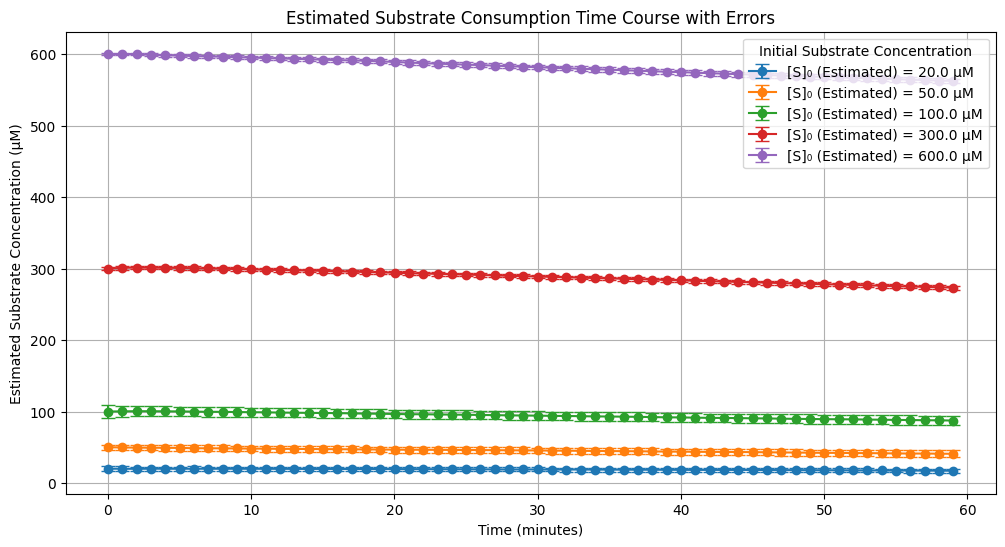

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have 'estimated_substrate_remaining_micromolar' and 'esds_estimated_substrate_remaining_micromolar' DataFrames

plt.figure(figsize=(12, 6))

# Get the x-values (time points in minutes)
x_values = estimated_substrate_remaining_micromolar.columns

# Iterate through each row (each initial substrate concentration)
for index, row in estimated_substrate_remaining_micromolar.iterrows():
    # Get the y-values (estimated substrate remaining) and y-errors (standard deviations)
    y_values = row.values
    y_errors = esds_estimated_substrate_remaining_micromolar.loc[index].values # Get the corresponding errors

    # Plot with error bars
    plt.errorbar(x=x_values, y=y_values, yerr=y_errors, marker='o', capsize=5, label=f'[S]₀ (Estimated) = {index} µM')

plt.xlabel('Time (minutes)')
plt.ylabel('Estimated Substrate Concentration (µM)')
plt.title('Estimated Substrate Consumption Time Course with Errors')
plt.grid(True)
plt.legend(title='Initial Substrate Concentration') # Add a legend
plt.show()

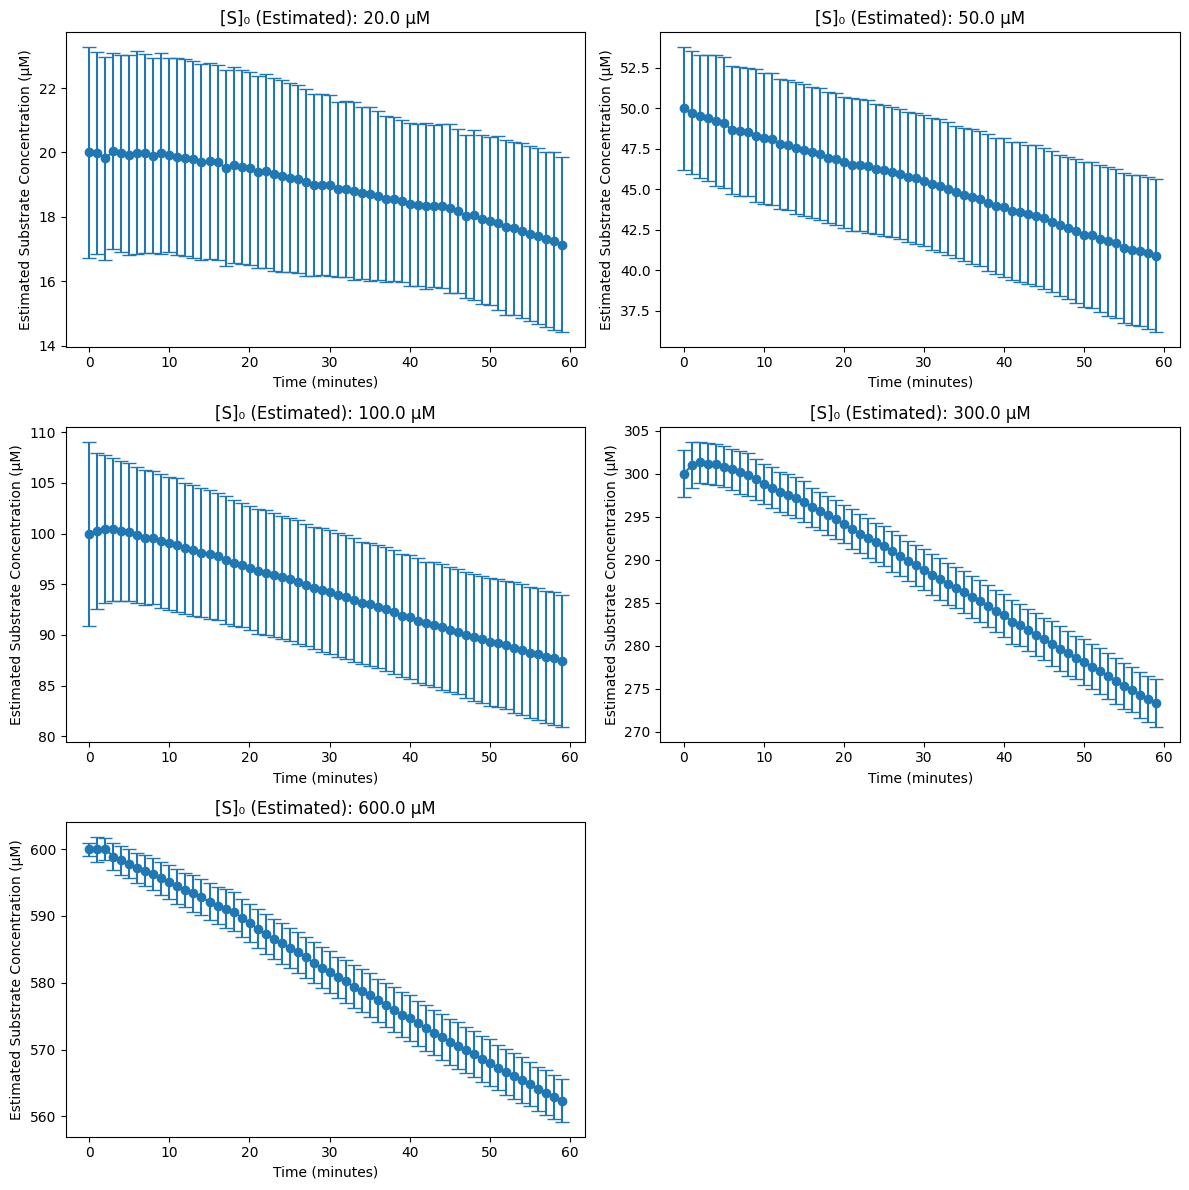

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have 'estimated_substrate_remaining_micromolar' and 'esds_estimated_substrate_remaining_micromolar' DataFrames

# Determine the number of rows (initial substrate concentrations) you want to plot
num_rows_to_plot = estimated_substrate_remaining_micromolar.shape[0]

# Calculate the number of rows and columns for your subplot grid
# Adjust this based on how you want to arrange the plots (e.g., 2 columns of plots)
num_subplot_rows = int(num_rows_to_plot / 2) + (num_rows_to_plot % 2 > 0)
num_subplot_cols = 2

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_subplot_rows, num_subplot_cols, figsize=(12, num_subplot_rows * 4)) # Adjust figsize

# Flatten the axes array if you have multiple rows of subplots
axes = axes.flatten()

# Get the x-values (time points in minutes - these will be the same for all plots)
x_values = estimated_substrate_remaining_micromolar.columns

# Loop through each row (each initial substrate concentration) and create a subplot
for i, (index, row) in enumerate(estimated_substrate_remaining_micromolar.iterrows()):
    # Get the y-values (estimated substrate remaining) and y-errors (standard deviations) for the current initial concentration
    y_values = row.values
    y_errors = esds_estimated_substrate_remaining_micromolar.loc[index].values # Get the corresponding errors for the current group

    # Plot with error bars on the current subplot axis
    axes[i].errorbar(x=x_values, y=y_values, yerr=y_errors, marker='o', capsize=5)

    # Set title and labels for the current subplot
    axes[i].set_title(f'[S]₀ (Estimated): {index} µM')
    axes[i].set_xlabel('Time (minutes)')
    axes[i].set_ylabel('Estimated Substrate Concentration (µM)')

# Remove any unused subplots if the number of groups is odd
if num_rows_to_plot < len(axes):
    for j in range(num_rows_to_plot, len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the panel of plots
plt.show()

In [21]:
from scipy import stats
import pandas as pd
import numpy as np

# Assuming you have 'estimated_substrate_remaining_micromolar' and 'esds_estimated_substrate_remaining_micromolar' DataFrames

# Define the number of initial time points to use for the linear fit
num_initial_time_points = 10

# Create a dictionary to store estimated initial velocities and their errors
initial_velocities_micromolar_per_min = {}
initial_velocity_errors_micromolar_per_min = {}

# Select the first 'num_initial_time_points' columns (time points)
initial_time_points = estimated_substrate_remaining_micromolar.columns[:num_initial_time_points]

# Iterate through each row (each initial substrate concentration)
for index, row in estimated_substrate_remaining_micromolar.iterrows():
    try:
        # Get the estimated substrate concentration values for the initial time points
        substrate_values = row.loc[initial_time_points].values.astype(float)

        # Get the time point values (x-values for regression)
        time_values = initial_time_points.values.astype(float)

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(time_values, substrate_values)

        # Estimate the initial velocity (negative of the slope)
        initial_velocity = -slope
        initial_velocities_micromolar_per_min[index] = initial_velocity

        # The standard error of the slope is the estimated error for the initial velocity
        initial_velocity_errors_micromolar_per_min[index] = std_err

    except ValueError:
        print(f"Warning: Data for group {index} could not be converted to float. Skipping.")
        initial_velocities_micromolar_per_min[index] = np.nan
        initial_velocity_errors_micromolar_per_min[index] = np.nan
    except IndexError:
        print(f"Warning: Not enough time points ({num_initial_time_points}) available for group {index}. Skipping.")
        initial_velocities_micromolar_per_min[index] = np.nan
        initial_velocity_errors_micromolar_per_min[index] = np.nan
    except Exception as e:
        print(f"An error occurred for group {index}: {e}")
        initial_velocities_micromolar_per_min[index] = np.nan
        initial_velocity_errors_micromolar_per_min[index] = np.nan


# Convert the results to Pandas Series for easier viewing
initial_velocities_series = pd.Series(initial_velocities_micromolar_per_min)
initial_velocity_errors_series = pd.Series(initial_velocity_errors_micromolar_per_min)

print(f"Estimated Initial Velocities (µM/min) using the first {num_initial_time_points} time points:")
print(initial_velocities_series)

print(f"\nEstimated Errors for Initial Velocities (µM/min) using the first {num_initial_time_points} time points:")
print(initial_velocity_errors_series)

Estimated Initial Velocities (µM/min) using the first 10 time points:
20.0     0.001981
50.0     0.185895
100.0    0.105076
300.0    0.134430
600.0    0.529889
dtype: float64

Estimated Errors for Initial Velocities (µM/min) using the first 10 time points:
20.0     0.007316
50.0     0.009541
100.0    0.028756
300.0    0.061021
600.0    0.029394
dtype: float64


In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have 'estimated_substrate_remaining_micromolar' and 'esds_estimated_substrate_remaining_micromolar' DataFrames

# Define the range of time points to use for the linear fit (indices 10 to 20)
start_time_point_index = 10
end_time_point_index = 20

# Select the time points (columns) within the specified range
try:
    initial_time_points_range = estimated_substrate_remaining_micromolar.columns[start_time_point_index : end_time_point_index + 1] # Add 1 to include the end index
except IndexError:
    print(f"Error: Not enough time points available. The DataFrame only has {len(estimated_substrate_remaining_micromolar.columns)} columns.")
    # Handle this case as appropriate, maybe exit or skip the estimation
    # For now, let's assume there are enough columns for demonstration.
    # If you encounter this error, you might need to adjust start_time_point_index or end_time_point_index.


# Create a dictionary to store estimated velocities and their errors for this time range
velocities_micromolar_per_min_range = {}
velocity_errors_micromolar_per_min_range = {}

# Check if the selected time range is valid (at least 2 time points for regression)
if len(initial_time_points_range) < 2:
    print(f"Error: Not enough time points ({len(initial_time_points_range)}) selected for linear regression. Need at least 2.")
else:
    # Iterate through each row (each initial substrate concentration)
    for index, row in estimated_substrate_remaining_micromolar.iterrows():
        try:
            # Get the estimated substrate concentration values for the selected time points
            substrate_values = row.loc[initial_time_points_range].values.astype(float)

            # Get the time point values (x-values for regression)
            time_values = initial_time_points_range.values.astype(float)

            # Perform linear regression
            slope, intercept, r_value, p_value, std_err = stats.linregress(time_values, substrate_values)

            # Estimate the velocity (negative of the slope)
            velocity_in_range = -slope
            velocities_micromolar_per_min_range[index] = velocity_in_range

            # The standard error of the slope is the estimated error for the velocity
            velocity_errors_micromolar_per_min_range[index] = std_err

        except ValueError:
            print(f"Warning: Data for group {index} in the selected range could not be converted to float. Skipping.")
            velocities_micromolar_per_min_range[index] = np.nan
            velocity_errors_micromolar_per_min_range[index] = np.nan
        except Exception as e:
            print(f"An error occurred for group {index}: {e}")
            velocities_micromolar_per_min_range[index] = np.nan
            velocity_errors_micromolar_per_min_range[index] = np.nan


    # Convert the results to Pandas Series for easier viewing
    velocities_series_range = pd.Series(velocities_micromolar_per_min_range)
    velocity_errors_series_range = pd.Series(velocity_errors_micromolar_per_min_range)

    # Corrected line: Use square brackets for indexing an Index object
    print(f"Estimated Velocities (µM/min) using time points {initial_time_points_range[0]} to {initial_time_points_range[-1]} minutes:")
    print(velocities_series_range)

    print(f"\nEstimated Errors for Velocities (µM/min) using time points {initial_time_points_range[0]} to {initial_time_points_range[-1]} minutes:")
    print(velocity_errors_series_range)

Estimated Velocities (µM/min) using time points 10.002516666666667 to 20.004883333333332 minutes:
20.0     0.041304
50.0     0.147194
100.0    0.243050
300.0    0.464133
600.0    0.590042
dtype: float64

Estimated Errors for Velocities (µM/min) using time points 10.002516666666667 to 20.004883333333332 minutes:
20.0     0.004077
50.0     0.004432
100.0    0.006587
300.0    0.009258
600.0    0.013322
dtype: float64


Estimated Vmax (from time points 10-20): 0.8596 µM/min (Error: 0.0893)
Estimated Km (from time points 10-20): 260.2273 µM (Error: 47.3540)


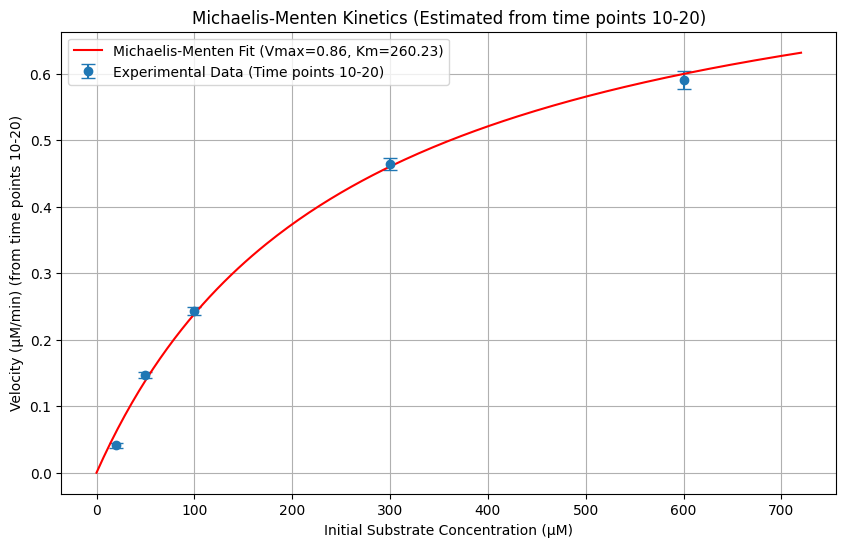

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Assuming you have 'velocities_series_range' and 'velocity_errors_series_range'

# Define the Michaelis-Menten equation
def michaelis_menten(S, Vmax, Km):
    """Michaelis-Menten equation."""
    return (Vmax * S) / (Km + S)

# Prepare data for fitting
# The substrate concentrations are the index of the velocities_series_range
# We'll use the initial substrate concentrations as the x-values for the fit,
# assuming that even at later time points, the enzyme kinetics are related
# to the initial substrate concentration used in that reaction.
substrate_concentrations = velocities_series_range.index.values.astype(float)
velocities = velocities_series_range.values
velocity_errors = velocity_errors_series_range.values

# Remove any data points with NaN values (from groups where velocity estimation failed)
valid_indices = ~np.isnan(velocities) & ~np.isnan(velocity_errors)
substrate_concentrations_valid = substrate_concentrations[valid_indices]
velocities_valid = velocities[valid_indices]
velocity_errors_valid = velocity_errors[valid_indices]


# Perform non-linear least squares fitting to estimate Vmax and Km
# Use try-except to handle potential fitting errors
try:
    # Provide initial guesses for Vmax and Km
    # A reasonable guess for Vmax could be the highest observed velocity
    # A reasonable guess for Km could be around the middle of your substrate concentration range
    initial_guess_Vmax = np.max(velocities_valid) if len(velocities_valid) > 0 else 1.0
    initial_guess_Km = np.median(substrate_concentrations_valid) if len(substrate_concentrations_valid) > 0 else 100.0
    p0 = [initial_guess_Vmax, initial_guess_Km] # Initial guess for parameters [Vmax, Km]

    # Use sigma for error weighting in the fit
    params, covariance = curve_fit(michaelis_menten, substrate_concentrations_valid, velocities_valid, p0=p0, sigma=velocity_errors_valid)

    # Extract estimated Vmax and Km
    estimated_Vmax = params[0]
    estimated_Km = params[1]

    # Calculate standard errors of the estimated parameters from the covariance matrix
    perr = np.sqrt(np.diag(covariance))
    estimated_Vmax_error = perr[0]
    estimated_Km_error = perr[1]


    print(f"Estimated Vmax (from time points 10-20): {estimated_Vmax:.4f} µM/min (Error: {estimated_Vmax_error:.4f})")
    print(f"Estimated Km (from time points 10-20): {estimated_Km:.4f} µM (Error: {estimated_Km_error:.4f})")

    # Generate points for the fitted Michaelis-Menten curve
    substrate_fit = np.linspace(0, np.max(substrate_concentrations_valid) * 1.2, 200) # Extend the range slightly
    velocity_fit = michaelis_menten(substrate_fit, estimated_Vmax, estimated_Km)

    # Plot the experimental data with error bars and the fitted curve
    plt.figure(figsize=(10, 6))
    plt.errorbar(substrate_concentrations_valid, velocities_valid, yerr=velocity_errors_valid, fmt='o', capsize=5, label='Experimental Data (Time points 10-20)')
    plt.plot(substrate_fit, velocity_fit, 'r-', label=f'Michaelis-Menten Fit (Vmax={estimated_Vmax:.2f}, Km={estimated_Km:.2f})')

    plt.xlabel('Initial Substrate Concentration (µM)')
    plt.ylabel('Velocity (µM/min) (from time points 10-20)')
    plt.title('Michaelis-Menten Kinetics (Estimated from time points 10-20)')
    plt.legend()
    plt.grid(True)
    plt.show()

except RuntimeError as e:
    print(f"Error fitting Michaelis-Menten curve: {e}")
    print("Could not estimate Vmax and Km. This might happen if the data is not well-described by the Michaelis-Menten model or if initial guesses are poor.")
    # Plot just the experimental data if fitting fails
    plt.figure(figsize=(10, 6))
    plt.errorbar(substrate_concentrations_valid, velocities_valid, yerr=velocity_errors_valid, fmt='o', capsize=5, label='Experimental Data (Time points 10-20)')
    plt.xlabel('Initial Substrate Concentration (µM)')
    plt.ylabel('Velocity (µM/min) (from time points 10-20)')
    plt.title('Michaelis-Menten Kinetics (Estimated from time points 10-20, Fit Failed)')
    plt.legend()
    plt.grid(True)
    plt.show()
except ValueError as e:
    print(f"Value error during fitting: {e}")
    print("This might occur if there are not enough valid data points or issues with initial guesses.")
    # Plot just the experimental data if fitting fails
    plt.figure(figsize=(10, 6))
    plt.errorbar(substrate_concentrations_valid, velocities_valid, yerr=velocity_errors_valid, fmt='o', capsize=5, label='Experimental Data (Time points 10-20)')
    plt.xlabel('Initial Substrate Concentration (µM)')
    plt.ylabel('Velocity (µM/min) (from time points 10-20)')
    plt.title('Michaelis-Menten Kinetics (Estimated from time points 10-20, Fit Failed)')
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"An unexpected error occurred during fitting: {e}")
    # Plot just the experimental data if fitting fails
    plt.figure(figsize=(10, 6))
    plt.errorbar(substrate_concentrations_valid, velocities_valid, yerr=velocity_errors_valid, fmt='o', capsize=5, label='Experimental Data (Time points 10-20)')
    plt.xlabel('Initial Substrate Concentration (µM)')
    plt.ylabel('Velocity (µM/min) (from time points 10-20)')
    plt.title('Michaelis-Menten Kinetics (Estimated from time points 10-20, Fit Failed)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [28]:
import numpy as np

# Assuming you have the estimated_Vmax, estimated_Vmax_error,
# and you know the enzyme_concentration_micromolar

# Given total enzyme concentration in micromolar
enzyme_concentration_micromolar = 2  # Make sure this is the correct value for your experiment

# Check if estimated_Vmax is available (i.e., if the fitting was successful)
if 'estimated_Vmax' in locals() and estimated_Vmax is not None:
    # Calculate kcat
    try:
        kcat = estimated_Vmax / enzyme_concentration_micromolar

        # Calculate the error in kcat using propagation of error
        # Assuming the error in enzyme concentration is negligible compared to Vmax error
        # Error(kcat) = Error(Vmax) / [E]0
        kcat_error = estimated_Vmax_error / enzyme_concentration_micromolar

        print(f"\nEstimated kcat: {kcat:.4f} min⁻¹ (Error: {kcat_error:.4f})")

    except ZeroDivisionError:
        print("Error: Enzyme concentration is zero. Cannot calculate kcat.")
    except Exception as e:
        print(f"An error occurred during kcat calculation: {e}")
else:
    print("\nEstimated Vmax not available. Cannot calculate kcat. Ensure Michaelis-Menten fitting was successful.")




Estimated kcat: 0.4298 min⁻¹ (Error: 0.0447)


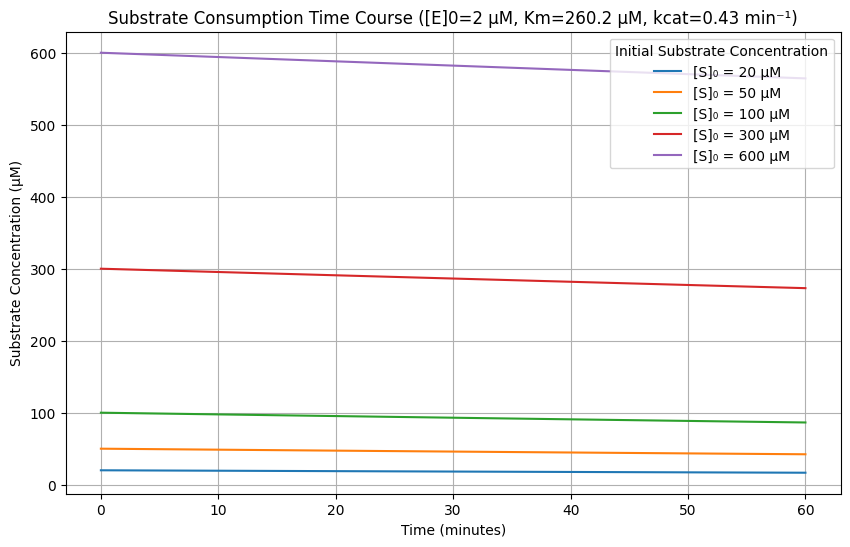

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# calculate time curves with given parameters

# Given enzyme concentration
enzyme_concentration_micromolar = 2 # micromolar

# Calculate Vmax (in micromolar per minute)
Vmax_concentration_rate = kcat * enzyme_concentration_micromolar # µM / min

# List of initial substrate concentrations to plot
initial_substrate_concentrations_micromolar = [20, 50, 100, 300, 600] # micromolar

# Time points for the plot (1 hour = 60 minutes)
time_points_min = np.linspace(0, 60, 100) # Simulate over 100 small time steps

# Create the figure and axes for the plot
plt.figure(figsize=(10, 6))

# Loop through each initial substrate concentration
for initial_substrate_concentration in initial_substrate_concentrations_micromolar:

    # Simulate substrate consumption over time for the current initial concentration
    substrate_concentration_micromolar = [initial_substrate_concentration]
    current_substrate_concentration = initial_substrate_concentration

    # Use a simple forward Euler integration for simulation
    time_step_min = time_points_min[1] - time_points_min[0]

    for i in range(1, len(time_points_min)):
        # Calculate the reaction rate at the current substrate concentration (µM/min)
        reaction_rate_micromolar_per_min = (Vmax_concentration_rate * current_substrate_concentration) / (estimated_Km + current_substrate_concentration)

        # Calculate the change in substrate concentration in this time step (µM)
        change_in_substrate_concentration = reaction_rate_micromolar_per_min * time_step_min

        # Update the current substrate concentration (µM)
        current_substrate_concentration -= change_in_substrate_concentration

        # Ensure substrate concentration doesn't go below zero
        if current_substrate_concentration < 0:
            current_substrate_concentration = 0

        # Store the updated substrate concentration
        substrate_concentration_micromolar.append(current_substrate_concentration)

    # Plot the time course for the current initial concentration
    plt.plot(time_points_min, substrate_concentration_micromolar, label=f'[S]₀ = {initial_substrate_concentration} µM')

plt.xlabel('Time (minutes)')
plt.ylabel('Substrate Concentration (µM)')
plt.title(f'Substrate Consumption Time Course ([E]0={enzyme_concentration_micromolar} µM, Km={estimated_Km.round(1)} µM, kcat={kcat.round(3)} min⁻¹)')
plt.grid(True)
plt.legend(title='Initial Substrate Concentration') # Add a legend to distinguish lines
plt.show()